<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# ESSAIS DE NAPPE - RESOLUTION DU PROBLEME INVERSE - METHODE DE COOPER-JACOB

# Solutions applicables en nappe captive d'extension infinie

Préambule: ce cours est adapté en partie du cours "Transient Groundwater Flow Short Course (Module 3 at UNESCO-IHE, Delft, Netherlands)" construit par Theo Olsthoorn, 08-Jan-2018 et du "Guide des essais de pompage et leurs interprétations" par R.P. Chapuis, 2007

Les essais de nappe sont réalisés pour obtenir les propriétés hydrodynamiques (transmissivité et coefficient d'emmagasinnement) de l'aquifère. Cette détermination est basée sur l'exploitation des données obtenues lors de la réalisation d'un pompage d'essai sur le site de caractérisation. Cette approche constitue la résolution du problème inverse en hydrogéologie.

La réalisation de ce type de test nécessite a minima d'enregistrer sur un ou plusieurs ouvrages (cf. vidéo ci-après):
- le rabattement au cours du temps (la différence entre la hauteur piézométrique au repos dans l'ouvrage et la durant le pompage)  aux piézomètres d'observation;
- le débit d'exploitation au puits de pompage.

L'interprétation de l'essai de nappe en nappe captive est basée sur l'exploitation de la solution de Theis à l'équation de diffusivité. L'utilisation a minima d'un piézomètre d'observation peut être complétée par d'autres piézomètres afin de compléter l'estimation des paramètres de l'aquifère et avoir une idée notamment de son hétérogénéïté.

A la fin de la partie de terrain, on doit disposer du jeu de données suivant:
- valeur du débit (supposé constant) au puits de pompage;
- valeur du rabattement au cours du temps $ s = f(t)$ à la distance $r$ du piézomètre et éventuellement aux autres piézomètres d'observation.

A l'issue de l'interprétation du test, on obtient les paramètres hydrodynamiques de l'aquifère (transmissivité T et coefficient d'emmagasinnement S) et éventuellement des renseignements complémentaires sur les conditions de gisement de la nappe (effets de limite, drainance,...).

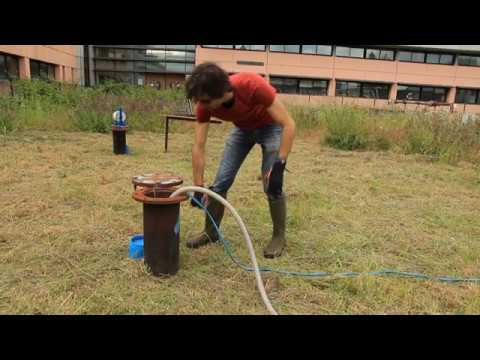

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('0rRd_DqilwI')

# Méthode de Cooper-Jacob - Résolution graphique standard 

La résolution de l'équation de diffusivité pour les hypothèses de Theis amène la solution de Theis:

$$
    s = \frac{Q}{4 \pi T} W(u)
$$
avec
$$
	u = \frac{r^2S}{4Kbt}
$$

La fonction de Theis W(u) peut etre obtenue à partir de son développement en série de Taylor (1):

$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!} + - \frac{u^5}{5.5!} - \cdots
$$

avec $\gamma = 0.5773$ (nombre d'Euler).

Jacob (1946) puis Jacob et Cooper (1951) proposent l'approximation suivante (2) du développement de Taylor pour la fonction de Theis:

$$
    W(u) \approx -\gamma - ln(u) 
$$

sous condition que $u$ soit suffisamment faible. En pratique:

$$
u < 1.10^{-2}
$$

Puisque $u = \frac{r^2S}{4Tt}$, la formulation de Cooper-Jacob pour la solution de Theis est (3):

$$
s = \frac{Q}{4 \pi T} ln\left({\frac{2.25Tt}{r^2S}}\right)
$$

ou en exprimant le logarithme en base 10 (4):

$$
s = \frac{2.3Q}{4 \pi T} log\left({\frac{2.25Tt}{r^2S}}\right)
$$

Cette formulation ne reste applicable que pour $ \frac{r^2S}{4Tt} < 1.10^{-2}$


Puisque $Q$, $T$ et $S$ sont constants, l'évolution du rabattement donné par l'équation (4), enregistré à une distance $r$, selon le logarithme du temps $t$ forme une droite (cf. figure).
<figure>
  <IMG SRC="jacob1.png" WIDTH=650 ALIGN="center">
</figure>
    
la pente de la droite, calculée sur un cycle log corresponds à (5):
    
$$
\alpha = \frac{s_a - s_b}{log (t_a) -log (t_b)} = \frac{\Delta s}{log(\frac{t_a}{t_b})} = \Delta s
$$

on a alors par analogie avec l'équation (4) l'expression directe pour $T$ (6):
$$
T = \frac{2.3Q}{4 \pi \Delta s}
$$

En prolongeant la droite de la solution de Jacob jusqu'à l'intercept $t_0$ pour lequel $s = 0$, l'équation (4) permet d'écrire (7)
$$
log\left({\frac{2.25Tt_0}{r^2S}}\right) = 0
$$
donc (8)
$$
\frac{2.25Tt_0}{r^2S} = 1
$$
et finalement pour le calcul du coefficient d'emmagasinement $S$ (9):
$$
S = \frac{2.25Tt_0}{r^2}
$$

## Procedure pratique d'interprétation par la méthode de Cooper - Jacob
Pour un essai de nappe réalisé à débit constant $Q$ suivi à un piézomètre situé à une distance $r$ du forage exploité:
1. Reporter les valeurs de $s$ au cours du temps $t$ sur une graphique semi-log (axe des abscisses en log base 10)
2. Isoler la portion des données qui corresponds au régime d'écoulement de Theis et tracer la droite s'ajustant au mieux aux données retenues
3. Etendre la droite jusqu'à l'intercept $t_0$ pour $s = 0$
4. Calculer la pente de la droite sur un cycle log, en calculant $\Delta s$ sur un cycle log (rmq: on peut tout à fait calculer la pente sur une portion de droite ne correspondant pas à un cycle log, par la formule classique de la pente d'une droite)
5. A partir des valeurs de la pente ou de $\Delta s$ et de $t_0$, calculer $T$ et $S$ à partir des équations (6) et (9)
6. Vérifier la condition de validité de l'approximation de Cooper-Jacob
$$
u_1 = \frac{r^2S}{4Tt_1} < 1.10^{-2}
$$
avec $t_1$ la valeur minimale des données utilisées pour la régression linéaire. Dans le cas où $u_1 > 1.10^{-2}$, on reprends le calage de la droite théorique en choisissant une borne inférieure $t_2 >t_1$, amenant à un nouveau calcul de $T_2$ et $S_2$ et une nouvelle validation de $u_2$. La procédure est itérative jusqu'à validation, ou abandon de la méthode pour l'interprétation de l'essai.
    

 ## Pourquoi une condition $u  < 1.10^{-2}$?

Cette condition est induite par l'indice de troncature de la série de Taylor. Une analyse numérique peut être réalisée pour mettre en évidence les écarts entre la solution exacte de Theis et la solution approchée selon l'indice de troncature. Dans le cas de la solution de Cooper-Jacob, la valeur limite de $u  = 1.10^{-2}$ permet de réduire totalement ces écarts. Cette valeur peut toutefois s'avérer quelquefois restrictive. On peut raisonnablement retenir une valeur limite pour u plus importante. Toutefois, c'est à l'hydrogéologue de justifier un tel choix et d'estimer les incertitudes ainsi engendrées sur les interprétations de l'essai de nappe.


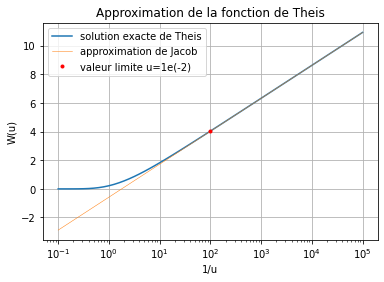

In [5]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# valeurs de u à utiliser pour x-axis
u = np.logspace(-5, 1, 61)

# parametrage figure
plt.title('Approximation de la fonction de Theis')
plt.xlabel('1/u')
plt.ylabel('W(u)')
plt.xscale('log')
#plt.yscale('log')
plt.grid()

plt.plot(1/u, sp.exp1(u), label='solution exacte de Theis') # tracer W(u) en fonction de 1/u' 
plt.plot(1/u, np.log(0.56 / u), lw=0.5, label='approximation de Jacob')
plt.plot(100, sp.exp1(1/100), '.',color='red', label='valeur limite u=1e(-2)') # valeur limite de Jacob
plt.legend()
plt.show()

## Application 1: essai de nappe standard

Pour caractériser les propriétés hydrodynamiques d'un aquifère, un essai de nappe est réalisé. Un puits $F$ est pompé au débit de 547 litre/minute durant 12 heures. Les profondeurs sont enregistrés à un piézomètre $P_a$ situé à 8.2 mètres de $F$ (fichier TD_Theis1.txt). Le niveau statique de la nappe est $N_{stat} = -5.32$ mètre/repère.
1. Construire le graphique expérimental	$s = log10(t)$;
2. A l'aide de la solution de Cooper-Jacob, déterminer les paramètres hydrodynamiques de l'aquifère (T et S);
3. Comparer les résulats obtenus avec les résultats obtenus par l'interprétation à l'aide de la méthode de Theis.

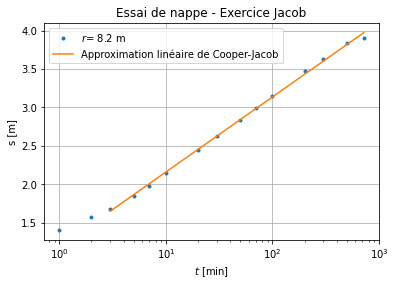

pente =  0.9765057714584796
ordonnée origine =  1.1824186390207063
intercept t0  = 6.15e-02 [min]
Resultats interprétation:
T = 1.0e-01 m2/min
S = 2.1e-04 (-)
u1 = 2.1e-02


In [2]:
import numpy as np
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

fname ='TD_Theis1.txt'
data = np.loadtxt(fname,  skiprows=1) # chargement des donnees de l'essai de nappe - saute 1ere ligne
# colonnes sont [t[minutes], prof[m]] (voir 1ere ligne fichier texte)

Q = 788/(24*60) # m3/min

r  = 8.2 #distance du piezometre d'observation
t = data[:,0]
s = data[:,1]-5.32 #prof(t) - prof(t=0)

# parametrage de la figrue figure
plt.title('Essai de nappe - Exercice Jacob')
plt.ylabel('s [m]')
plt.xlabel('$t$ [min]')
plt.xscale('log')
plt.grid()

plt.plot(t, s, '.',label='$r$= {:.1f} m'.format(r))

t_cal = data[2:,0]
s_cal = data[2:,1]-5.32

m, b = np.polyfit(np.log10(t_cal),s_cal, 1)
plt.plot(t_cal, m * np.log10(t_cal) + b, label='Approximation linéaire de Cooper-Jacob' ) 
plt.legend()
plt.show()

print('pente = ', m)
print('ordonnée origine = ', b)

#calcul de t0 - approche analytique
t0 = pow(10,-b/m)
print('intercept t0  = {:.2e} [min]'.format(t0))

#calcul des parametres T et S de l'aquifère
T = (2.3*Q)/(4*3.1415*m)
S = (2.25*T*t0)/r**2
u1 = r**2*S/(4*T*(data[2,1]-5.32))
print('Resultats interprétation:')
print('T = {:.1e} m2/min'.format(T))
print('S = {:.1e} (-)'.format(S))
print('u1 = {:.1e}'.format(u1))



## Procedure alternative d'interprétation par la méthode de Cooper-Jacob
Pour un essai de nappe réalisé à débit constant $Q$ suivi à plusieurs piézomètres situé chacun à une dist\ ance $r_i$ du forage exploité, on utilise une représentation graphique semilog  de la  forme $s = f(log (t/r^2))$
1. Reporter les valeurs de $s$ en fonction de $t/r^2$ sur une graphique semi-log (axe des abscisses en log base 10)
2. Isoler la portion des données qui corresponds au régime d'écoulement de Theis et tracer la droite s'ajustant au mieux aux données retenues pour tous les piézomètres
3. Etendre la droite jusqu'à l'intercept $(t/r^2)_0$ pour $s = 0$
4. Calculer la pente en calculant $\Delta s$ sur un cycle log de $t/r^2$ (rmq: on peut tout à fait calculer la pente sur une portion de droite ne correspondant pas à un cycle log, par la formule classique de la pente d'une droite)
5. A partir des valeurs de la pente ou de $\Delta s$ et de $t_0$, calculer $T$ et $S$ à partir des équations suivantes
$$
T = \frac{2.3Q}{4 \pi \Delta s}
$$
et
$$
S = 2.25T(t/r^2)_0
$$
6. Vérifier la condition de validité de l'approximation de Cooper-Jacob


## Application 2: test de ‘Oude Korendijk, south of Rotterdam, The Netherlands' (In *Kruseman & de Ridder*)
La description du test est tirée de Kruseman & de Ridder pp. 56:

"The lithological cross-section (figure) of the test site is derived from the borings. The first 18 m below the surface, consisting of clay, peat, and clayey fine sand, form the impermeable confining layer. Between 18 and 25 m below the surface lies the aquifer, which consists of coarse sand with some gravel. The base of the aquifer is formed by fine sandy and clayey sediments, which are considered impermeable.
<figure>
  <IMG SRC="cross_section.png" WIDTH=750 ALIGN="center">
</figure>
The well screen was installed over the whole thickness of the aquifer, and piezometers were placed at distances of 0.8, 30, 90, and 215 m from the well, and at different depths. The two piezometers at a depth of 30 m, H30, and H215 showed a drawdown during pumping, from which it could be concluded that the clay layer between 25 and 27 m is not completely impermeable. For our purposes, however, we shall assume that all the water was derived from the aquifer between 18 and 25 m, and that the base is impermeable. The well was pumped at a constant discharge of 9.12 L/s (or 788 m3/d) for nearly 14 hours."
    
1. Construire le graphique expérimental	log(s) = log10(t) pour les 3 piézomètres H30, H90 et H215;
2. A l'aide de la méthode de Cooper-Jacob, déterminer les paramètres hydrodynamiques de l'aquifère (T et S) pour les piézomètres H30 et H90;
3. Comparer les résultats avec ceux obtenus à partir de la méthode de Theis.

intercept t0_30  = 2.51e-01 [min]
intercept t0_90  = 1.98e+00 [min]
Resultats interprétation:
r=30 T_30 = 2.7e-01 m2/min
r=30 S_30 = 1.7e-04 (-)
u1_30 = 4.2e-02
r=90 T_90 = 3.2e-01 m2/min
r=90 S_90 = 1.8e-04 (-)
u1_90 = 2.0e-01


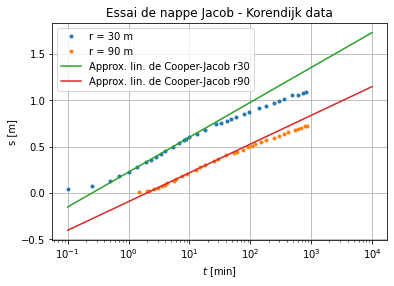

In [1]:
import numpy as np
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

fname ='Korendijk_data.txt' # Data de Krusemand & De Ridder
data = np.loadtxt(fname,  skiprows=1) # chargement des donnees de l'essai de nappe - saut 1ere ligne

# affichage des données (juste 1ere ligne 4 colonnes first 4 lines)
# Les colonnes sont [r[m], z[m], t[minutes], s[m]] (cf. fichier initial .txt)
data[:4]
#print(data[0])

Q = 788/(24*60) # m3/min

# plot the data pour chaque piezometre
#selection des donnees en fonction de la distance d'observation r
r=30
I = data[:, 0] == r
t30 = data[I,2] # [min]
s30 = data[I,3]

r=90
I = data[:, 0] == r
t90 = data[I,2] # [min]
s90 = data[I,3]

# parametrage de la figure
plt.title('Essai de nappe Jacob - Korendijk data')
plt.ylabel('s [m]')
plt.xlabel('$t$ [min]')
plt.xscale('log')
plt.grid()
plt.plot(t30, s30, '.',label='r = 30 m')
plt.plot(t90, s90, '.',label='r = 90 m')

# Ajustement des droites de Jacob
t_jacob = np.logspace(-1, 4, 20)
t_cal30 = t30[4:15]
s_cal30 = s30[4:15]
m30, b30 = np.polyfit(np.log10(t_cal30),s_cal30, 1)
t_cal90 = t90[4:19]
s_cal90 = s90[4:19]
m90, b90 = np.polyfit(np.log10(t_cal90),s_cal90, 1)

plt.plot(t_jacob, m30 * np.log10(t_jacob) + b30, label='Approx. lin. de Cooper-Jacob r30' )
plt.plot(t_jacob, m90 * np.log10(t_jacob) + b90, label='Approx. lin. de Cooper-Jacob r90' )
plt.legend()

#calcul de t0 - approche analytique
t0_30 = pow(10,-b30/m30)
t0_90 = pow(10,-b90/m90)
print('intercept t0_30  = {:.2e} [min]'.format(t0_30))
print('intercept t0_90  = {:.2e} [min]'.format(t0_90))

#calcul des parametres T et S de l'aquifère
T30 = (2.3*Q)/(4*3.1415*m30)
S30 = (2.25*T30*t0_30)/30**2
u1_30 = 30**2*S30/(4*T30*(t_cal30[5]))

T90 = (2.3*Q)/(4*3.1415*m90)
S90 = (2.25*T90*t0_90)/90**2
u1_90 = 90**2*S90/(4*T90*(t_cal90[4]))

print('Resultats interprétation:')
print('r=30 T_30 = {:.1e} m2/min'.format(T30))
print('r=30 S_30 = {:.1e} (-)'.format(S30))
print('u1_30 = {:.1e}'.format(u1_30))
print('r=90 T_90 = {:.1e} m2/min'.format(T90))
print('r=90 S_90 = {:.1e} (-)'.format(S90))
print('u1_90 = {:.1e}'.format(u1_90))

## Remarque sur la représentation linéaire de Cooper-Jacob
d'après R.P. Chapuis, 2007
<figure>
  <IMG SRC="jacob3.png" WIDTH=650 ALIGN="center">
</figure>